<a href="https://colab.research.google.com/github/pharringtonp19/rfp/blob/main/notebooks/statistics/Gaussians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install distrax

In [2]:
import jax 
import jax.numpy as jnp 
import distrax 
from functools import partial 
import matplotlib.pyplot as plt

In [3]:
n = 100 
d = 10 

In [4]:
#@title **Sample** { display-mode: "form" }
def sample(dist, key, n):
  return dist.sample(seed=key, sample_shape=(n,))

In [5]:
#@title **Estimator** { display-mode: "form" }
def estimator(data):
  return jnp.mean(data, axis=0)

In [6]:
#@title **Deviation** { display-mode: "form" }
def deviation(mu, data):
  estimate = estimator(data)
  return jnp.linalg.norm(estimate - mu)**2  

In [7]:
#@title **Simulate** { display-mode: "form" }
def simulate(dist, n, mu, key): 
  data = sample(dist, key, n)
  return deviation(mu, data)

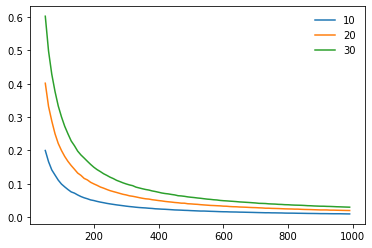

In [11]:
#@title **Data Generating Process** { display-mode: "form" }


for j in [10, 20, 30]:
  results = []
  for i in range(50, 1000, 10):
    mu = jnp.zeros(shape=(j,))
    sigma = jnp.ones_like(mu)
    dist_distrax = distrax.MultivariateNormalDiag(mu, sigma)
    f = partial(simulate, dist_distrax, i, mu)
    ans = jnp.mean(jax.vmap(jax.jit(f))(jax.random.split(jax.random.PRNGKey(0), 5000)))
    results.append(ans)
  plt.plot(range(50, 1000, 10), results, label=j)
plt.legend(frameon=False)
plt.show()

In [12]:
def benchmark(sigma, d, n):
  return d*sigma**2/n

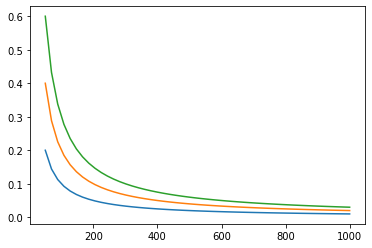

In [13]:
for j in [10, 20, 30]:
  f = partial(benchmark, 1, j)
  f_vec = jax.vmap(f)
  ys = f_vec(jnp.linspace(50, 1000))
  plt.plot(jnp.linspace(50, 1000), ys)
plt.show()